In [1]:
import pandas as pd
import numpy as np

In [2]:
pattern=pd.read_csv("data.csv")

In [3]:
pattern.describe

<bound method NDFrame.describe of              V1         V2
0      2.072345  -3.241693
1     17.936710  15.784810
2      1.083576   7.319176
3     11.120670  14.406780
4     23.711550   2.557729
5     24.169930  32.024780
6     21.665780   4.892855
7      4.693684  12.342170
8     19.211910  -1.121366
9      4.230391  -4.441536
10     9.127130  23.605720
11     0.407503  15.297050
12     7.314846   3.309312
13    -3.438403 -12.025270
14    17.639350  -3.212345
15     4.415292  22.815550
16    11.941220   8.122487
17     0.725853   1.806819
18     8.185273  28.132600
19    -5.773587   1.024800
20    18.769430  24.169460
21     7.752016  -3.334991
22    10.611320  28.443780
23     2.021650  -4.687122
24     5.145525  11.186000
25     6.243310  19.477160
26   -11.706710   8.073185
27     7.255978  14.637040
28     3.392373   1.220712
29    24.299900  40.428870
...         ...        ...
2970  84.633760 -10.654310
2971  59.708580  -7.022610
2972  66.620590   0.278247
2973  79.442900 -20.8

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X=pattern["V1"]
Y=pattern["V2"]

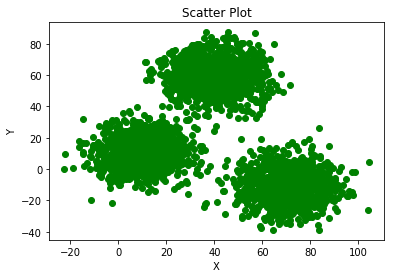

In [6]:
plt.scatter(X,Y,color="g")
plt.title('Scatter Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
#from scatter plot the appropriate value of k is 3
#create multiple kMeans models from sklearn library using the values of k from 1 to 10
clusters = []
WSS = []
K = range(1,11)

In [8]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [9]:
#calculate the within sum of squares for each value of k through for loop
for i in K:
    kmeans = KMeans(n_clusters=i).fit(pattern)
    clusters.append(kmeans.cluster_centers_)
    WSS.append(sum(np.min(cdist(pattern, kmeans.cluster_centers_, 'euclidean'), axis=1)) / pattern.shape[0])

In [10]:
WSS

[39.52434767194924,
 24.92664428548198,
 12.670900904711125,
 11.77156344598344,
 10.985287011308564,
 10.231773431110273,
 9.528798161411412,
 8.940764868834426,
 8.401181778199131,
 8.09263730913074]

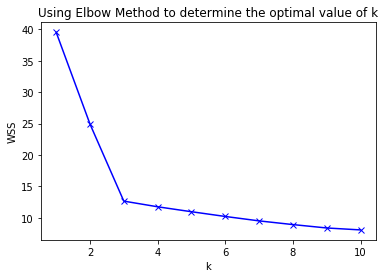

In [11]:
#use elbow method to determine the most optimum value of k
plt.plot(K, WSS, 'bx-')
plt.xlabel('k')
plt.ylabel('WSS')
plt.title('Using Elbow Method to determine the optimal value of k')
plt.show()

In [12]:
#using k which is 3 from elbow method to create a final kMeans model using the sklearn library
kmodel = KMeans(n_clusters=3).fit(pattern)

In [13]:
prediction = kmodel.predict(pattern)

In [14]:
kmodel.labels_

array([2, 2, 2, ..., 1, 1, 1])

In [15]:
centroids = kmodel.cluster_centers_
centroids

array([[ 40.68362784,  59.71589274],
       [ 69.92418447, -10.11964119],
       [  9.4780459 ,  10.686052  ]])

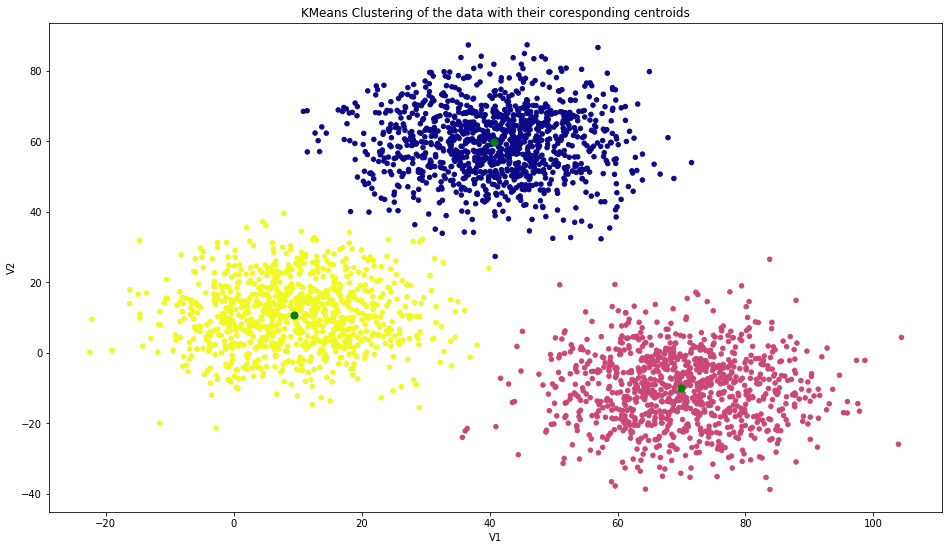

In [16]:
#visualize the clusters of V1 and V2 using scatter plot, 
#show the clusters, centroids, and mapping of each point to a cluster 
plt.rcParams['figure.figsize'] = (16, 9)
plt.scatter(pattern['V1'], pattern['V2'], c=prediction, s=20, cmap='plasma')
plt.scatter(centroids[:,0], centroids[:,1], c='green', marker='.', s=200)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('KMeans Clustering of the data with their coresponding centroids')
plt.show()